In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [2]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('Republican party', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536486000.0
2018-09-09 02:40:00
'Angry' U.S. Steel workers nationally overwhelmingly back a strike as talks resume
16571
2
1536278639.0
2018-09-06 17:03:59
Former Arkansas State Senator Sentenced To 220 Months In Federal Prison For Wire Fraud, Mail Fraud And Money Laundering
3597
3
1536212930.0
2018-09-05 22:48:50
Confederate group loses fight over Ole Miss' Civil War monuments changes
488
4
1535770257.0
2018-08-31 19:50:57
Arkansas State Senator Jeremy Hutchinson Indicted on Wire and Tax Fraud Charges | OPA
2529
5
1535444837.0
2018-08-28 01:27:17
Three-judge panel rules unconstitutional gerrymandering in North Carolina
2162
6
1534921089.0
2018-08-21 23:58:09
GOP Rep. Duncan Hunter and his wife indicted in use of campaign funds for personal expenses
1507
7
1534891610.0
2018-08-21 15:46:50
Georgia candidates decry plan to close voting sites in mostly black county
1140
8
1534888447.0
2018-08-21 14:54:07
EPA’S new coal pollution rules will lead to more deaths
846
9
1534876325

In [3]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536486e+09,2018-09-09 02:40:00,'Angry' U.S. Steel workers nationally overwhel...,16571
1,1.536279e+09,2018-09-06 17:03:59,Former Arkansas State Senator Sentenced To 220...,3597
2,1.536213e+09,2018-09-05 22:48:50,Confederate group loses fight over Ole Miss' C...,488
3,1.535770e+09,2018-08-31 19:50:57,Arkansas State Senator Jeremy Hutchinson Indic...,2529
4,1.535445e+09,2018-08-28 01:27:17,Three-judge panel rules unconstitutional gerry...,2162
5,1.534921e+09,2018-08-21 23:58:09,GOP Rep. Duncan Hunter and his wife indicted i...,1507
6,1.534892e+09,2018-08-21 15:46:50,Georgia candidates decry plan to close voting ...,1140
7,1.534888e+09,2018-08-21 14:54:07,EPA’S new coal pollution rules will lead to mo...,846
8,1.534876e+09,2018-08-21 11:32:05,Russian hackers targeted U.S. conservative thi...,1723
9,1.533954e+09,2018-08-10 19:25:03,US budget deficit totals $76.9 billion in July,996


In [4]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [5]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536486e+09,2018-09-09 02:40:00,'Angry' U.S. Steel workers nationally overwhel...,16571
1,1,1.536279e+09,2018-09-06 17:03:59,Former Arkansas State Senator Sentenced To 220...,3597
2,3,1.535770e+09,2018-08-31 19:50:57,Arkansas State Senator Jeremy Hutchinson Indic...,2529
3,4,1.535445e+09,2018-08-28 01:27:17,Three-judge panel rules unconstitutional gerry...,2162
4,5,1.534921e+09,2018-08-21 23:58:09,GOP Rep. Duncan Hunter and his wife indicted i...,1507
5,6,1.534892e+09,2018-08-21 15:46:50,Georgia candidates decry plan to close voting ...,1140
6,7,1.534888e+09,2018-08-21 14:54:07,EPA’S new coal pollution rules will lead to mo...,846
7,8,1.534876e+09,2018-08-21 11:32:05,Russian hackers targeted U.S. conservative thi...,1723
8,9,1.533954e+09,2018-08-10 19:25:03,US budget deficit totals $76.9 billion in July,996
9,10,1.533878e+09,2018-08-09 22:20:56,Judge orders plane carrying deported mother an...,1287


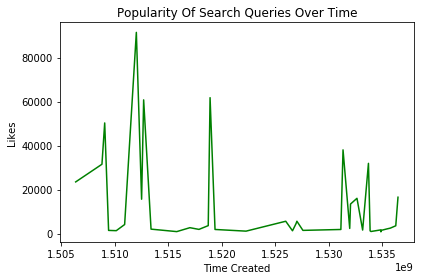

In [6]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()